#                                            Big Mart Sales Prediction 

In [ ]:
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
train = pd.read_csv("C:/Users/Rohit/Downloads/Train_Big_Mart.csv")
test = pd.read_csv("C:/Users/Rohit/Downloads/Test_Big_Mart.csv")

## Feature Engineering Steps

#### Item_Fat_Content
Item_Fat_Content has five unique values ('LF', 'Low Fat', 'low fat', 'reg', 'Regular').
It can be easily noticed that there are actually only two distinct values that are useful.
Changing the values to only two types of values.

In [3]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(['LF','Low Fat'],'low fat')
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('reg','Regular')
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace(['LF','Low Fat'],'low fat')
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace('reg','Regular')

#### Item_Outlet_Age
This data can be used to find out the age of the outlet. I substracted the Outlet_Establishmenyt_Year by 2013 to get the Outlet age. (Given data is of year 2013.) 

In [4]:
train['Item_Outlet_Age'] = 2013 - train['Outlet_Establishment_Year']
train.drop('Outlet_Establishment_Year', axis=1, inplace=True)
test['Item_Outlet_Age'] = 2013 - test['Outlet_Establishment_Year']
test.drop('Outlet_Establishment_Year', axis=1, inplace=True)


#### Putting actual values of Item_Weight
Find the value of Item_Weight by matching the Item_Identifier

In [5]:
train['Item_Weight'] = train['Item_Weight'].fillna(0)
test['Item_Weight'] = test['Item_Weight'].fillna(0)
s=''
value=0
for i in range(train['Item_Type'].count()):
    if (train['Item_Weight'][i]==0):
        s = train['Item_Identifier'][i]
    for i in range(train['Item_Type'].count()):
        if (train['Item_Weight'][i]>0 and train['Item_Identifier'][i] ==s):
            value= train['Item_Weight'][i]
            break
    train['Item_Weight'][i]=value
s=''
value=0
for i in range(test['Item_Type'].count()):
    if (test['Item_Weight'][i]==0):
        s = test['Item_Identifier'][i]
    for i in range(test['Item_Type'].count()):
        if (test['Item_Weight'][i]>0 and test  ['Item_Identifier'][i] ==s):
            value= test['Item_Weight'][i]
            break
    train['Item_Weight'][i]=value

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#### Putting mean value of Item_Weight
Uncomment the cell below and comment the cell above to to fill 'Item_Weight' values by mean values.

In [6]:
# train['Item_Weight']=train['Item_Weight'].fillna(train['Item_Weight'].mean())
# test['Item_Weight']=test['Item_Weight'].fillna(test['Item_Weight'].mean())

#### Item_Identifier
This column is unique so it cannot be used to train the data as it doesn't add any feature.

In [7]:
train.drop('Item_Identifier',axis=1,inplace = True)
test.drop('Item_Identifier',axis=1,inplace = True)

#### Outlet_Size
Outlet size has 

In [8]:
train['Outlet_Size'] = train['Outlet_Size'].fillna('yolo')
test['Outlet_Size'] = test['Outlet_Size'].fillna('yolo')

In [9]:
X = pd.get_dummies(train)
test = pd.get_dummies(test)

In [10]:
X_train = X.drop("Item_Outlet_Sales",axis=1)
Y_train = X["Item_Outlet_Sales"]
X_test  = test#.drop("Loan_Status",axis=1).copy()

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2)

In [12]:
#Linear Regression Model
regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)
y_pred = regr.predict(x_test)

In [13]:
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test,y_pred)
print ('R Square : ',regr.score(x_test, y_test))
print ('Adjusted R Square : ',1 - (1-regr.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MAE : ', mae)
print('MSE : ', mse)
print('RMSE : ', rmse)

('R Square : ', 0.55868418745985804)
('Adjusted R Square : ', 0.54725939520264788)
('MAE : ', 850.82328688634198)
('MSE : ', 1300166.9207667266)
('RMSE : ', 1140.2486223480942)


In [14]:
#Decision Tree
from sklearn import tree
model = tree.DecisionTreeRegressor() #for regression
fit_model = model.fit(x_train, y_train)
y_pred1 = model.predict(x_test)

In [15]:
mse = mean_squared_error(y_test, y_pred1)
rmse = np.sqrt(mean_squared_error(y_test, y_pred1))
mae = mean_absolute_error(y_test,y_pred1)
print ('R Square : ',model.score(x_test, y_test))
print ('Adjusted R Square : ',1 - (1-model.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MAE : ', mae)
print('MSE : ', mse)
print('RMSE : ', rmse)

('R Square : ', 0.2041894883651677)
('Adjusted R Square : ', 0.18358753050827559)
('MAE : ', 1064.3510039882697)
('MSE : ', 2344548.8990538688)
('RMSE : ', 1531.1919863471951)


In [16]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor(n_neighbors=5) # default value for n_neighbors is 5
model.fit(x_train, y_train)
y_pred2 = model.predict(x_test)

In [17]:
mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred2))
mae = mean_absolute_error(y_test,y_pred2)
print ('R Square : ',model.score(x_test, y_test))
print ('Adjusted R Square : ',1 - (1-model.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MAE : ', mae)
print('MSE : ', mse)
print('RMSE : ', rmse)

('R Square : ', 0.46785562421980659)
('Adjusted R Square : ', 0.45407946036758007)
('MAE : ', 893.14738723753658)
('MSE : ', 1567758.2692519838)
('RMSE : ', 1252.1015411107774)


In [18]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create Random Forest object
model= RandomForestRegressor()
# Train the model using the training sets and check score
model.fit(x_train, y_train)
#Predict Output
y_pred3= model.predict(x_test)

In [19]:
mse = mean_squared_error(y_test, y_pred3)
rmse = np.sqrt(mean_squared_error(y_test, y_pred3))
mae = mean_absolute_error(y_test,y_pred3)
print ('R Square : ',model.score(x_test, y_test))
print ('Adjusted R Square : ',1 - (1-model.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MAE : ', mae)
print('MSE : ', mse)
print('RMSE : ', rmse)

('R Square : ', 0.52763223457026143)
('Adjusted R Square : ', 0.51540356875841387)
('MAE : ', 822.91923278592367)
('MSE : ', 1391649.5298757942)
('RMSE : ', 1179.6819613250827)


In [20]:
from sklearn.cluster import KMeans
Ks = range(1, 10)
km = [KMeans(n_clusters=i) for i in Ks]
score = [km[i].fit(X_train).score(X_train) for i in range(len(km))]

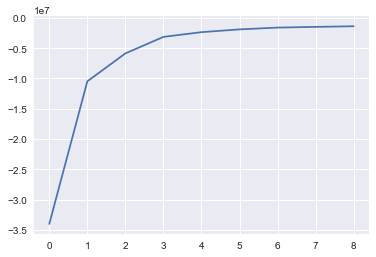

In [21]:
plt.plot(score)
plt.show()

In [22]:
score

[-34020948.368866757,
 -10469724.956310812,
 -5861193.9810675643,
 -3129102.8127296967,
 -2350446.9094159333,
 -1890518.3361365283,
 -1595848.3216816653,
 -1477312.7527877025,
 -1373392.4529958353]